*Ryan Harper*

### Non-NN Stocks Predictor:

**INDICATORS:** <br>
<font color=blue>__HOUST__</font> : Housing Starts: Total: New Privately Owned Housing Units Started <br>
<font color=blue>__UNRATENSA__</font>:Civilian Unemployment Rate NSA<br>
<font color=blue>__EMRATIO__</font>: Civilian Employment-Population Ratio<br>
<font color=blue>__UEMPMED__</font>: Median Duration of Unemployment<br>
<font color=blue>__UMCSENT__</font>: University of Michigan: Consumer Sentiment<br>
<font color=blue>__USSLIND__</font>: Leading Index For United States<br>
<font color=blue>__KCFSI__</font>: Kansas City Financial Stress Index<br>
<font color=blue>__IPMAN__</font></font>: Industrial Production: Manufacturing (NAICS)<br>
<font color=blue>__VIXCLS__</font>: CBOE Volatility Index: NSA<br>
<font color=blue>__DGS10__</font>: 10-Year Treasury Constant Maturity Rate<br>

In [14]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf


# ======== imports and clean csv files ========

# indicators
indicators = pd.read_csv('Indicators_train.csv').iloc[1:].dropna(how='all')
indicators.date = pd.to_datetime(indicators.date)
idicators = indicators.set_index(indicators.date)
for column in indicators:
    if 'dt' in column:
        del indicators[column]
    elif 'date' in column:
        continue
    else:
        indicators[column] = indicators[column].astype(float)
indicators = indicators.set_index(indicators.date)
del indicators['date']

# stock
stock = pd.read_csv('stocks-us-adjClose.csv')
stock.date = pd.to_datetime(stock.date)
stock = stock.set_index(stock.date)
del stock['date']

# sector
sector = pd.read_csv('Company_information.csv', encoding = "ISO-8859-1")
seclist = sector.Sector.unique()
sectorset = []
print('|',end='')
for member in seclist:
    if str(member) != 'nan':
        sectorset.append(member)
        print(member, end='|')
        
# Create dataframes for each sector
utilities = pd.DataFrame(data=stock, columns=sector.loc[sector['Sector'] == 'Utilities']['Symbol'].tolist())
basicmaterials = pd.DataFrame(data=stock, columns=sector.loc[sector['Sector'] == 'Basic Materials']['Symbol'].tolist())
consumer = pd.DataFrame(data=stock, columns=sector.loc[sector['Sector'] == 'Consumer Goods']['Symbol'].tolist())
industrial = pd.DataFrame(data=stock, columns=sector.loc[sector['Sector'] == 'Industrial Goods']['Symbol'].tolist())
healthcare = pd.DataFrame(data=stock, columns=sector.loc[sector['Sector'] == 'Healthcare']['Symbol'].tolist())
services = pd.DataFrame(data=stock, columns=sector.loc[sector['Sector'] == 'Services']['Symbol'].tolist())
financial = pd.DataFrame(data=stock, columns=sector.loc[sector['Sector'] == 'Financial']['Symbol'].tolist())
technology = pd.DataFrame(data=stock, columns=sector.loc[sector['Sector'] == 'Technology']['Symbol'].tolist())
conglomerates = pd.DataFrame(data=stock, columns=sector.loc[sector['Sector'] == 'Conglomerates']['Symbol'].tolist())

# Merges sector dataframes with indicators
indic_utilities = pd.merge(utilities,indicators, how='inner', left_index=True, right_index=True)
indic_basicmaterials = pd.merge(basicmaterials,indicators, how='inner', left_index=True, right_index=True)

|Utilities|Basic Materials|Consumer Goods|Industrial Goods|Healthcare|Services|Financial|Technology|Conglomerates|

In [3]:
indic_utilities.describe()

,ED,SJW,SJI,DUK,D,MSEX,NJR,AVA,SO,VVC,...,HOUST,UNRATENSA,EMRATIO,UEMPMED,UMCSENT,USSLIND,KCFSI,IPMAN,VIXCLS,DGS10
count,12066.000000,11454.000000,9488.000000,9488.000000,9488.000000,9486.000000,9488.000000,9488.000000,9035.000000,7556.000000,...,12056.000000,1675.000000,5258.000000,9010.000000,4843.000000,1656.000000,1755.000000,2485.000000,1744.000000,1419.000000
mean,16.336225,9.494950,8.013151,23.877897,19.080243,8.642402,8.249395,11.101860,14.297529,15.640705,...,1439.595637,6.550567,61.458920,9.828091,85.845654,1.459124,-0.422046,100.739757,16.598205,2.157533
std,19.194349,11.356128,9.141212,21.489318,20.499478,8.477251,9.466451,9.702220,14.324680,13.080522,...,440.820330,1.582892,2.208656,4.302035,12.910039,0.206431,0.322255,6.492845,5.519058,0.379547
min,0.092676,0.399763,0.435475,1.070123,0.536198,0.421944,0.320414,1.592584,0.383137,1.417035,...,458.000000,4.100000,58.100000,4.800000,55.300000,0.980000,-1.000000,90.361000,9.360000,1.370000
25%,0.988121,0.962391,1.236578,5.891199,3.631926,1.763580,1.249374,3.865414,2.087298,5.659078,...,1129.000000,5.100000,59.200000,7.000000,76.100000,1.360000,-0.630000,95.647800,13.130000,1.830000
50%,8.617091,3.018630,3.287879,17.384366,9.515924,5.654472,4.326344,8.437705,6.948526,12.057410,...,1474.000000,6.500000,62.300000,8.500000,87.700000,1.430000,-0.470000,100.267600,15.185000,2.190000
75%,25.782424,18.163491,13.050594,34.042749,27.799829,12.816000,12.111078,14.531053,22.791307,18.862372,...,1747.000000,7.900000,63.300000,10.300000,94.200000,1.570000,-0.250000,104.130800,18.120000,2.435000
max,85.529999,56.709999,37.544697,87.779999,80.643997,43.148598,43.963737,52.374588,51.490612,67.279999,...,2678.000000,9.500000,64.900000,25.500000,112.000000,1.950000,0.500000,117.041800,48.000000,3.010000


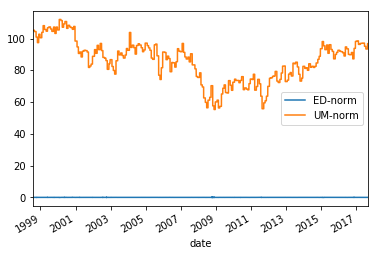

date
1998-07-31         NaN
1998-08-03    0.020680
1998-08-04   -0.024602
1998-08-05    0.013353
1998-08-06    0.007321
1998-08-07    0.010174
1998-08-10   -0.001439
1998-08-11    0.000000
1998-08-12    0.037464
1998-08-13   -0.008334
1998-08-14    0.008404
1998-08-17    0.014728
1998-08-18   -0.001385
1998-08-19   -0.008321
1998-08-20    0.008391
1998-08-21    0.026353
1998-08-24    0.010811
1998-08-25   -0.012032
1998-08-26    0.000000
1998-08-27    0.009472
1998-08-28    0.025469
1998-08-31   -0.010457
1998-09-01   -0.005284
1998-09-02   -0.027889
1998-09-03    0.005465
1998-09-04    0.002717
1998-09-08    0.014905
1998-09-09   -0.008011
1998-09-10    0.012113
1998-09-11    0.005319
                ...   
2017-07-31    0.005827
2017-08-01   -0.001448
2017-08-02   -0.000483
2017-08-03    0.005079
2017-08-04   -0.003850
2017-08-07    0.008454
2017-08-08    0.006707
2017-08-09   -0.009517
2017-08-10    0.004564
2017-08-11   -0.009206
2017-08-14    0.004502
2017-08-15    0.006057
2017-0

In [21]:
graph = indic_utilities[['ED','UMCSENT']].dropna(how='any')

# normalizing data - method 1
# graph['ED-norm'] = (graph['ED']-graph['ED'].mean())/graph['ED'].std()
# graph['UM-norm'] = (graph['UMCSENT']-graph['UMCSENT'].mean())/graph['UMCSENT'].std()

# normalizing data - method 2
# graph['ED-norm'] = np.log(graph['ED'])
# graph['UM-norm'] = graph['UMCSENT']

# normalizing data - method 3

graph['ED-norm'] = graph['ED'].pct_change()
graph['UM-norm'] = graph['UMCSENT']

list = ['ED-norm','UM-norm']
graph.plot(kind='line',y=list)
plt.show()

graph['ED-norm'].corr(graph['UM-norm'])

print(graph['ED-norm'])

In [13]:
x = indic_utilities['ED'].tolist()
y = indic_utilities['UMCSENT'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

nan


In [25]:
ed_pc = indic_utilities['ED'].pct_change()
unr_pc = indic_utilities['UNRATENSA']
ols_model = smf.ols('ed_pc ~ unr_pc', ed_pc).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  ed_pc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1779
Date:                Sat, 24 Mar 2018   Prob (F-statistic):              0.673
Time:                        12:56:39   Log-Likelihood:                -2277.1
No. Observations:                1675   AIC:                             4558.
Df Residuals:                    1673   BIC:                             4569.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.0925      0.098   1020.255      0.0

date
1998-07-31   -1.058374
1998-08-03   -1.039031
1998-08-04   -1.062519
1998-08-05   -1.050085
1998-08-06   -1.043176
1998-08-07   -1.033505
1998-08-10   -1.034887
1998-08-11   -1.034887
1998-08-12   -0.998963
1998-08-13   -1.007254
1998-08-14   -0.998963
1998-08-17   -0.984312
1998-08-18   -0.985710
1998-08-19   -0.994098
1998-08-20   -0.985710
1998-08-21   -0.959145
1998-08-24   -0.947961
1998-08-25   -0.960544
1998-08-26   -0.960544
1998-08-27   -0.950757
1998-08-28   -0.924193
1998-08-31   -0.935378
1998-09-01   -0.940970
1998-09-02   -0.970331
1998-09-03   -0.964738
1998-09-04   -0.961942
1998-09-08   -0.946563
1998-09-09   -0.954951
1998-09-10   -0.942368
1998-09-11   -0.936776
                ...   
2017-07-31    2.681618
2017-08-01    2.674847
2017-08-02    2.672590
2017-08-03    2.696289
2017-08-04    2.678233
2017-08-07    2.717731
2017-08-08    2.749328
2017-08-09    2.704189
2017-08-10    2.725630
2017-08-11    2.682183
2017-08-14    2.703235
2017-08-15    2.731685
2017-0